# Classifier Evaluation Assignment

- Complete this Jupyter Notebook.  
- Execute the initial cells and answer the numbered questions.  
- Don't import other libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

results = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/lab-evaluation-data.csv')
results.head()

,actual,prob
0,0.0,0.380052
1,1.0,0.827923
2,1.0,0.929093
3,1.0,0.472508
4,1.0,0.906988


## Data Definitions
- `actual`: Whether the event was true or not. A value of 1.0 is True and 0.0 is False.  
- `prob`: The probability that the event was True. This is estimated from a classification model.

## Question 1
- Determine the distribution of the actual event.
- Would you be concerned about bias due to imbalance?

<AxesSubplot:ylabel='actual'>

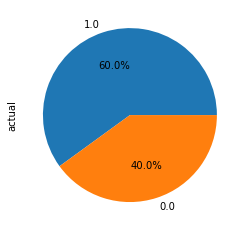

In [2]:
results.actual.value_counts().plot.pie(autopct = '%1.1f%%')

The `actual` is somewhat imbalanced. But, it is not a huge difference. 

## Question 2
- Create a histogram that shows the distribution of the probabilities for the True and False classes.  
- Describe what you observe.

In [3]:
import seaborn as sns

<AxesSubplot:xlabel='prob', ylabel='Count'>

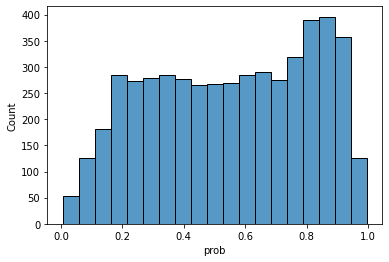

In [4]:
sns.histplot(data = results, x = 'prob')

There is a stable distributions between 0.2 to 0.8.
From 0.8 and further there is an increase in probability count.

## Question 3
- Create a simple confusion matrix. Use `0.5` as the threshold for whether an observation should be considered True or False.  
- Comment on what you observe.

In [5]:
from sklearn.metrics import confusion_matrix

In [6]:
results['predicted'] = results['prob'].round()

In [7]:
confusion_matrix(results['actual'], results['predicted'])

array([[1790,  210],
       [ 377, 2623]])

There are total 587 instances that are being incorrectly classfied.

---
## Question 4
- Calculate the accuracy, precision, and recall `without` using any pre-built functions.
- Which measure would you use if this was your model and why?

In [8]:
conf = confusion_matrix(results['actual'], results['predicted'])

**Accuracy**

In [9]:
print('Accuracy is: ', (conf[0][0] + conf[1][1])/results.shape[0])

Accuracy is:  0.8826


**Precision**

In [10]:
print('Precision is: ', conf[0][0] / (conf[0][0] + conf[0][1]))

Precision is:  0.895


**Recall**

In [11]:
print('Recall is: ', conf[0][0] / (conf[0][0] + conf[1][0]))

Recall is:  0.8260267651130595


## Question 5
- Construct a ROC curve plot.  
- Comment on the fit of the model based on this chart.

In [12]:
from sklearn import metrics

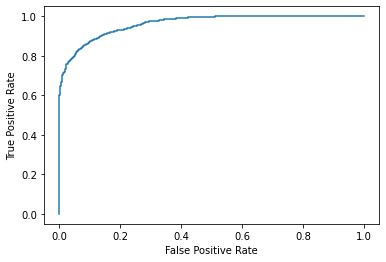

In [13]:
fpr, tpr, _ = metrics.roc_curve(results['actual'],  results['prob'])

#create ROC curve

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# Reference = https://www.statology.org/plot-roc-curve-python/

The model s performing quite well. The curve is closer to the upper left corner. Which means it is performing well.